In [1]:
#importing imp libraries

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as s
import matplotlib.pyplot as plt
#sns.set(style = 'whitegrid')
import warnings
warnings.filterwarnings('ignore')


In [2]:
#loading the dataset

data = pd.read_csv(r"C:\Users\ASUS\Desktop\avocado.csv")
data.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


Date - the date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold
PLU - Product Lookup codes 
Our task is to predict the Average Price. 

In [3]:
data.shape

(18249, 14)

In [4]:
#checking the unique values :
data.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


region,type and date are of object type which need to be transformed. other are continuous type which is fine

In [6]:
#droping unneccessary column:

data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
#checking the null values:

data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

not having any nulls in any column:

In [8]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


1. count is ok 
2. mean and std have very much differences between them in some of the columns which shows skewness
3. unevenness in interquantile range which shows data having outliers also .

#for further analysis lets first check if the categorical data is balanced or not.


In [9]:
#dividing dataset into two. categorical data and continuos data.
caterg = ['type','year','region']
contin = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

In [10]:
caterg

['type', 'year', 'region']

In [11]:
contin

['Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']

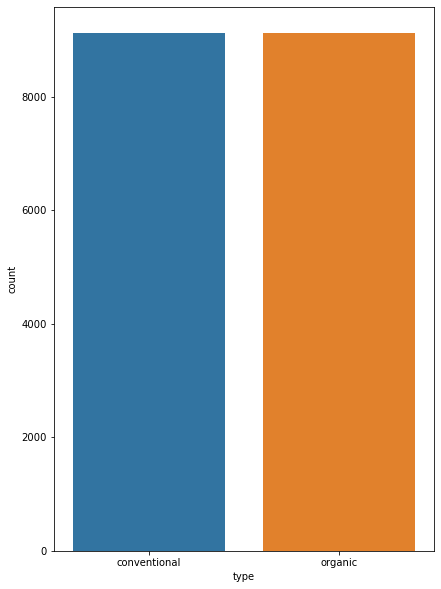

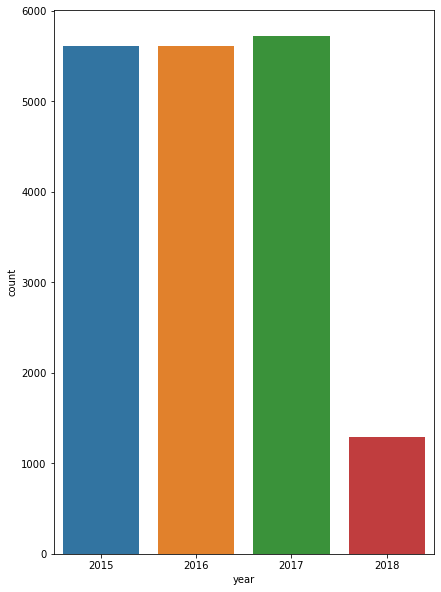

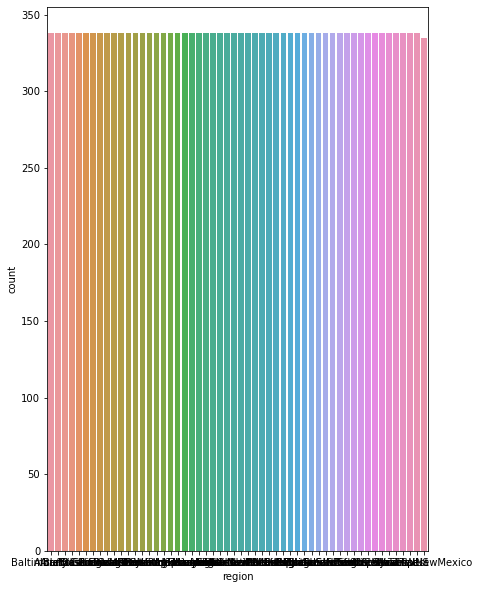

In [12]:
for i in caterg :
    plt.figure(figsize=(15,10))
    plt.subplot(1,2,2)
    sns.countplot(data[i])
    data[i].value_counts()

1. There are two type : conventional and organic which are almost same.
2. There are 4 years 2017 has the highest no. slightly less 2016 and 2015. 2018 has the least in no.
3. There are 54 region which seems to be equally distributed the last one west tex mexico is slightly less 
    

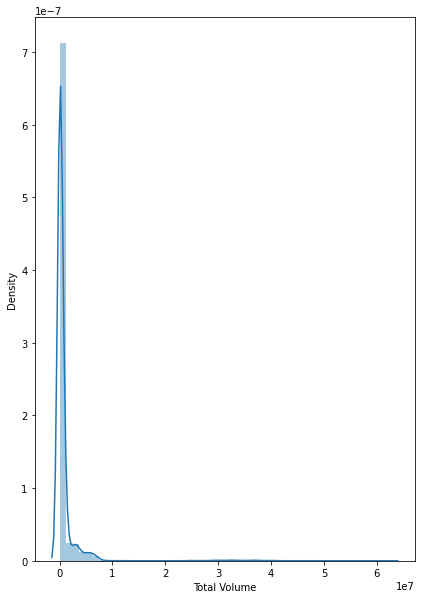

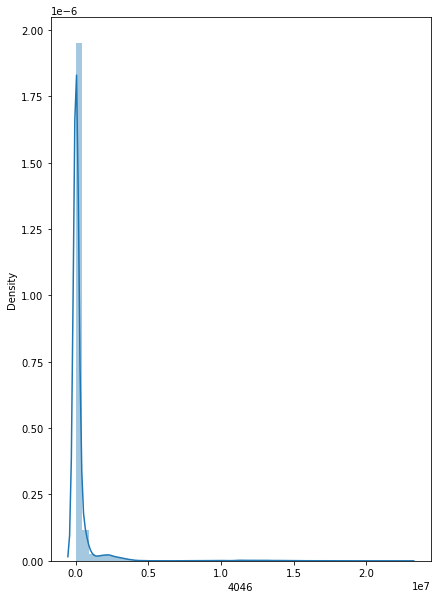

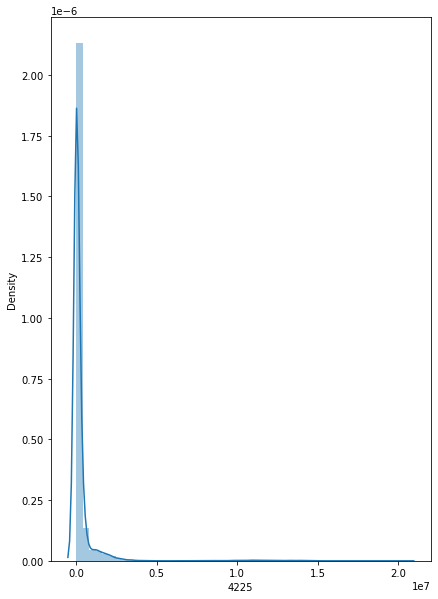

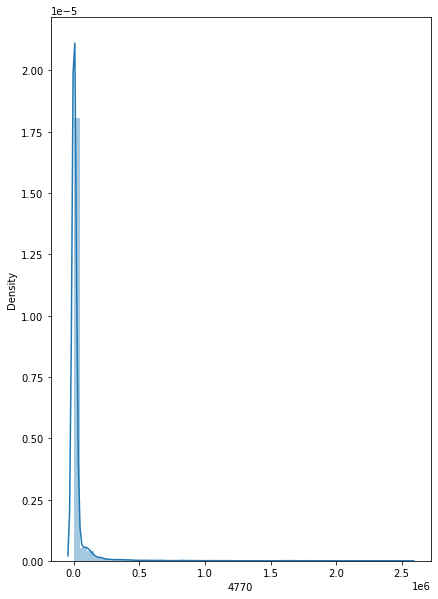

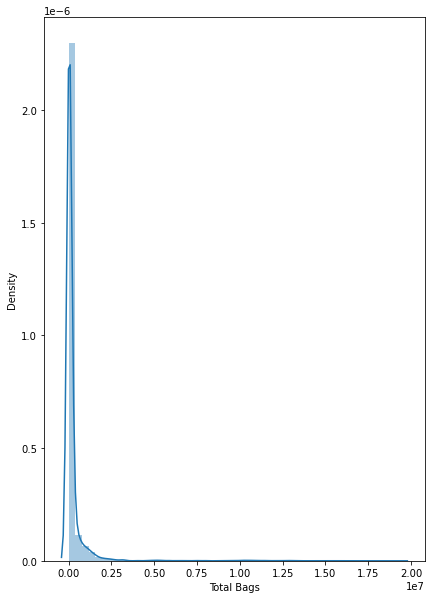

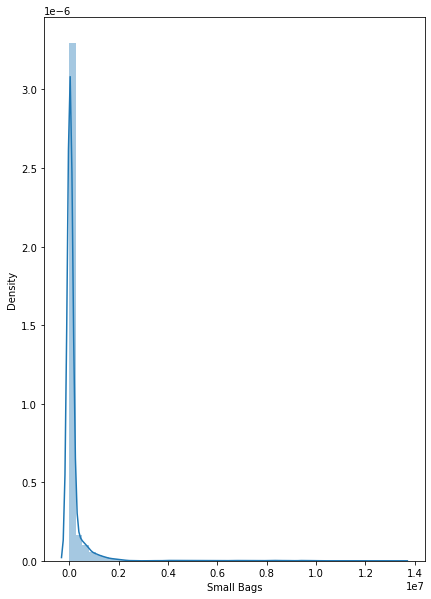

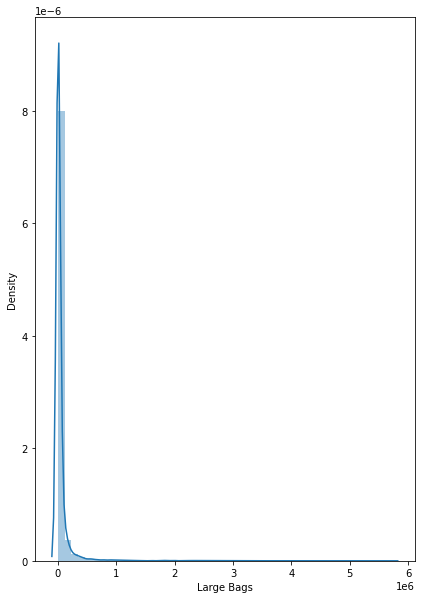

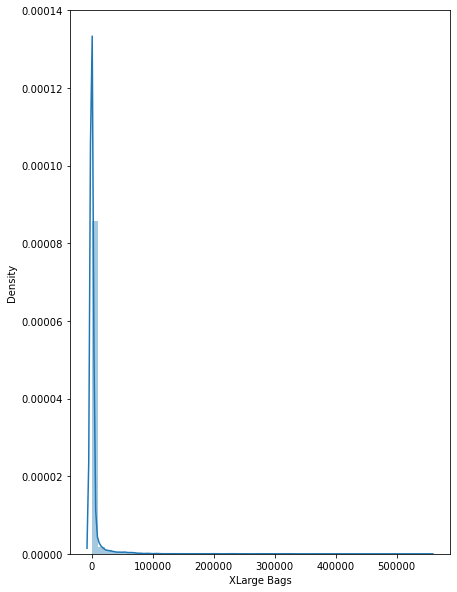

In [13]:
#now we will check sknewness in continuous data by plotting distribution plot:
for i in contin :
    plt.figure(figsize=(15,10))
    plt.subplot(1,2,2)
    sns.distplot(data[i])
plt.show()    
    

Almost all the features are highly skewed to the right.we have take care of that.

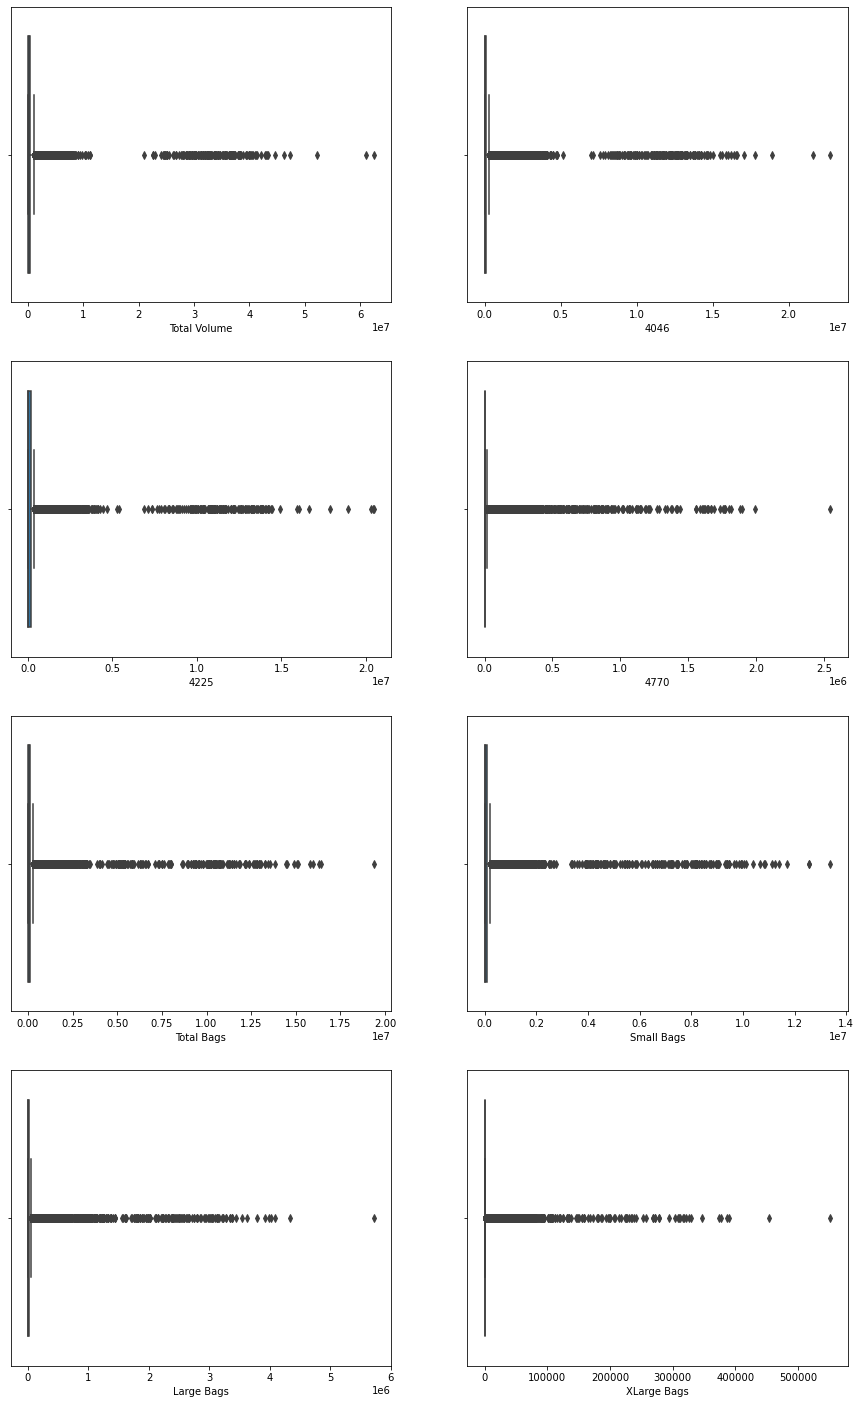

In [14]:
fig,ax=plt.subplots(4,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(contin):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.boxplot(data[n],ax=ax[r,c])
    c+=1

there are lots of outliers.

Before removing outliers and skewness lets first convert the date column into date time format

In [15]:
data['Date']=pd.to_datetime(data['Date'])

In [16]:
#Extracting month, day and year info from date column then dropping it.
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)
data['Year']=data['Date'].apply(lambda x:x.year)
data.drop('Date',axis=1,inplace=True)

In [17]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29,2015


<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

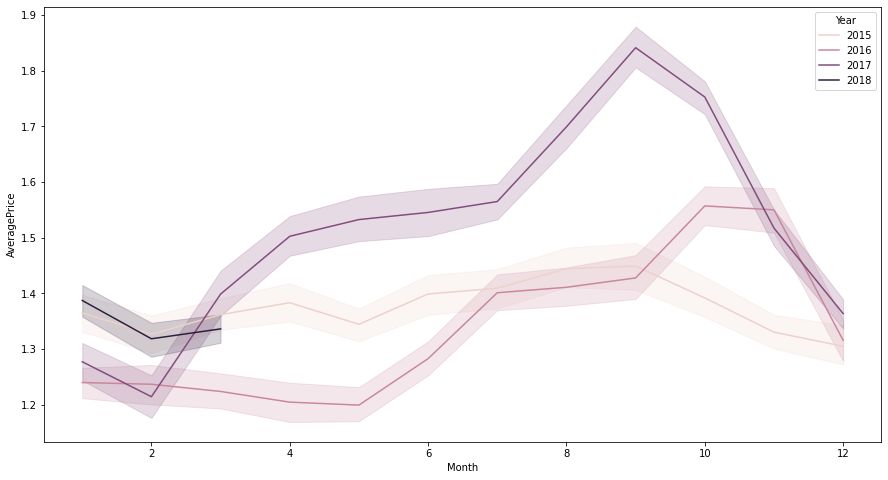

In [18]:
#lets see relation between average price and month.

plt.figure(figsize=(15,8))
sns.lineplot(x='Month',y='AveragePrice',hue='Year',data=data)

 we can see the price is high in sep and oct or we can conclude the avg price increases off season which is winter

In [19]:
data['Year'].replace(2015,1,inplace=True)
data['Year'].replace(2016,2,inplace=True)
data['Year'].replace(2017,3,inplace=True)
data['Year'].replace(2018,4,inplace=True)

In [20]:
#changing date month and yerar into time

data['Time']=(data['Year']*365)+(data['Month']*30)+(data['Day'])
data.drop(['Year','Month','Day'],axis=1,inplace=True)

In [21]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Time
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,752
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,745
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,738
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,731
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,724


now lets encode the categorical data into numerical data

In [22]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [23]:
data['region']=oe.fit_transform(data['region'].values.reshape(-1,1))
data['type']=oe.fit_transform(data['type'].values.reshape(-1,1))

In [24]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Time
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0,752
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0,745
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0,738
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0,731
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0,724


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  float64
 10  year          18249 non-null  int64  
 11  region        18249 non-null  float64
 12  Time          18249 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1.8 MB


converted all the categorical data.


Now lets remove the outliers and skewness of the data.

In [26]:
#choosing the right threshold.

def threhold(z,d):
    for i in np.arange(3,4,0.01):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,2),np.round(loss,2)))

In [27]:
#using z score to remove outliers.

from scipy.stats import zscore
z=np.abs(zscore(data))
threhold(z,data)

With threshold 3.0 data loss is 3.28%
With threshold 3.01 data loss is 3.27%
With threshold 3.02 data loss is 3.19%
With threshold 3.03 data loss is 3.17%
With threshold 3.04 data loss is 3.14%
With threshold 3.05 data loss is 3.13%
With threshold 3.06 data loss is 3.12%
With threshold 3.07 data loss is 3.09%
With threshold 3.08 data loss is 3.07%
With threshold 3.09 data loss is 3.03%
With threshold 3.1 data loss is 3.0%
With threshold 3.11 data loss is 3.0%
With threshold 3.12 data loss is 2.95%
With threshold 3.13 data loss is 2.94%
With threshold 3.14 data loss is 2.89%
With threshold 3.15 data loss is 2.89%
With threshold 3.16 data loss is 2.88%
With threshold 3.17 data loss is 2.85%
With threshold 3.18 data loss is 2.84%
With threshold 3.19 data loss is 2.83%
With threshold 3.2 data loss is 2.81%
With threshold 3.21 data loss is 2.8%
With threshold 3.22 data loss is 2.78%
With threshold 3.23 data loss is 2.76%
With threshold 3.24 data loss is 2.73%
With threshold 3.25 data loss i

In [28]:
data=data[(z<3.57).all(axis=1)]


Removing skewness

In [29]:
contin.append('Time')

In [30]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [31]:
for i in contin:
    if np.abs(data[i].skew())>0.5 and i!='Total Volume':
        data[i]=pt.fit_transform(data[i].values.reshape(-1,1))

# To remove skewness from total volume column we ise log transformation
data['Total Volume']=np.log(data['Total Volume'])

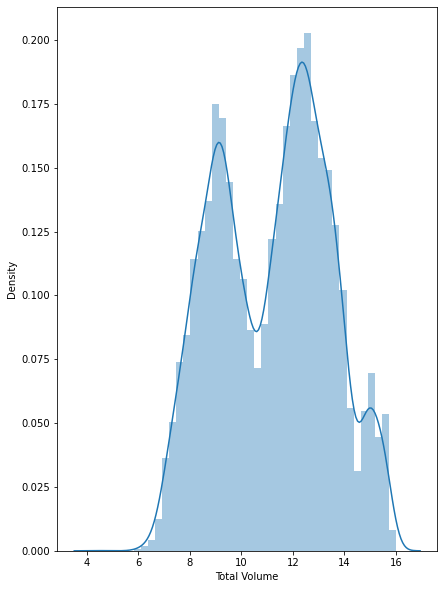

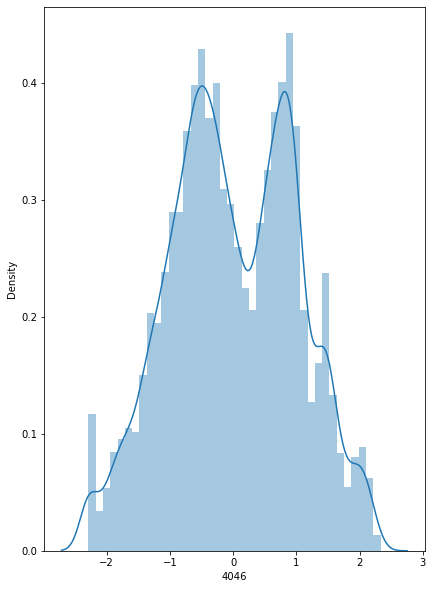

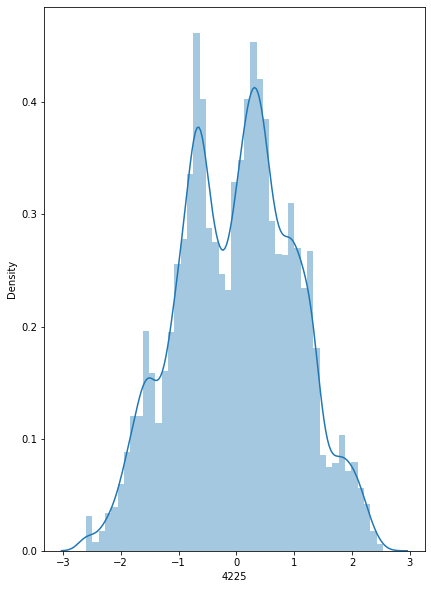

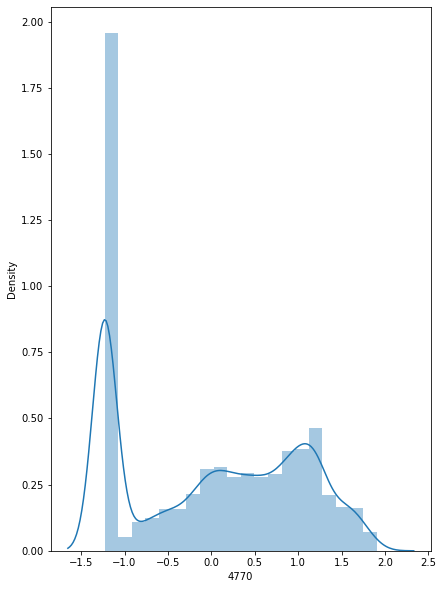

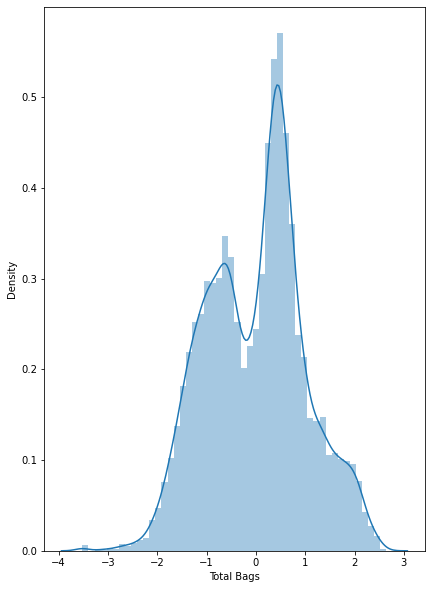

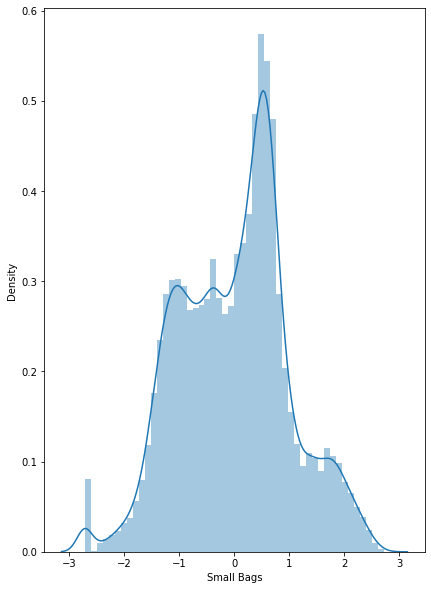

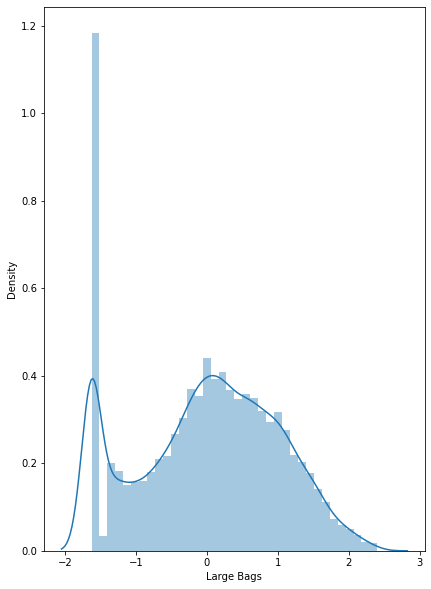

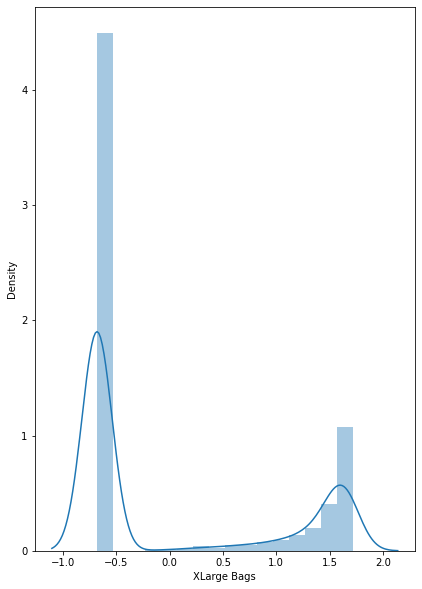

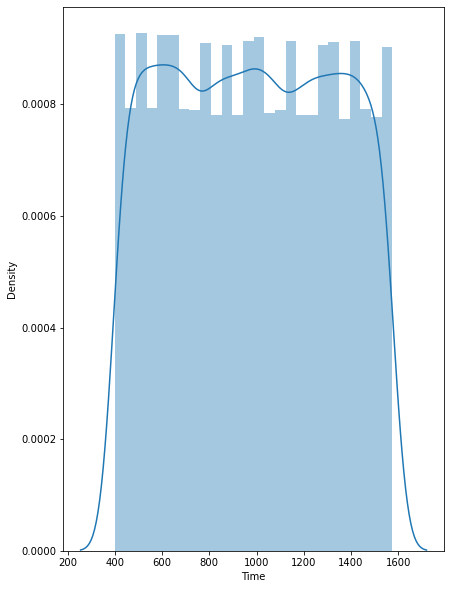

In [32]:
for i in contin :
    plt.figure(figsize=(15,10))
    plt.subplot(1,2,2)
    sns.distplot(data[i])
plt.show()    

removed skewness to some extent

IndexError: index 4 is out of bounds for axis 0 with size 4

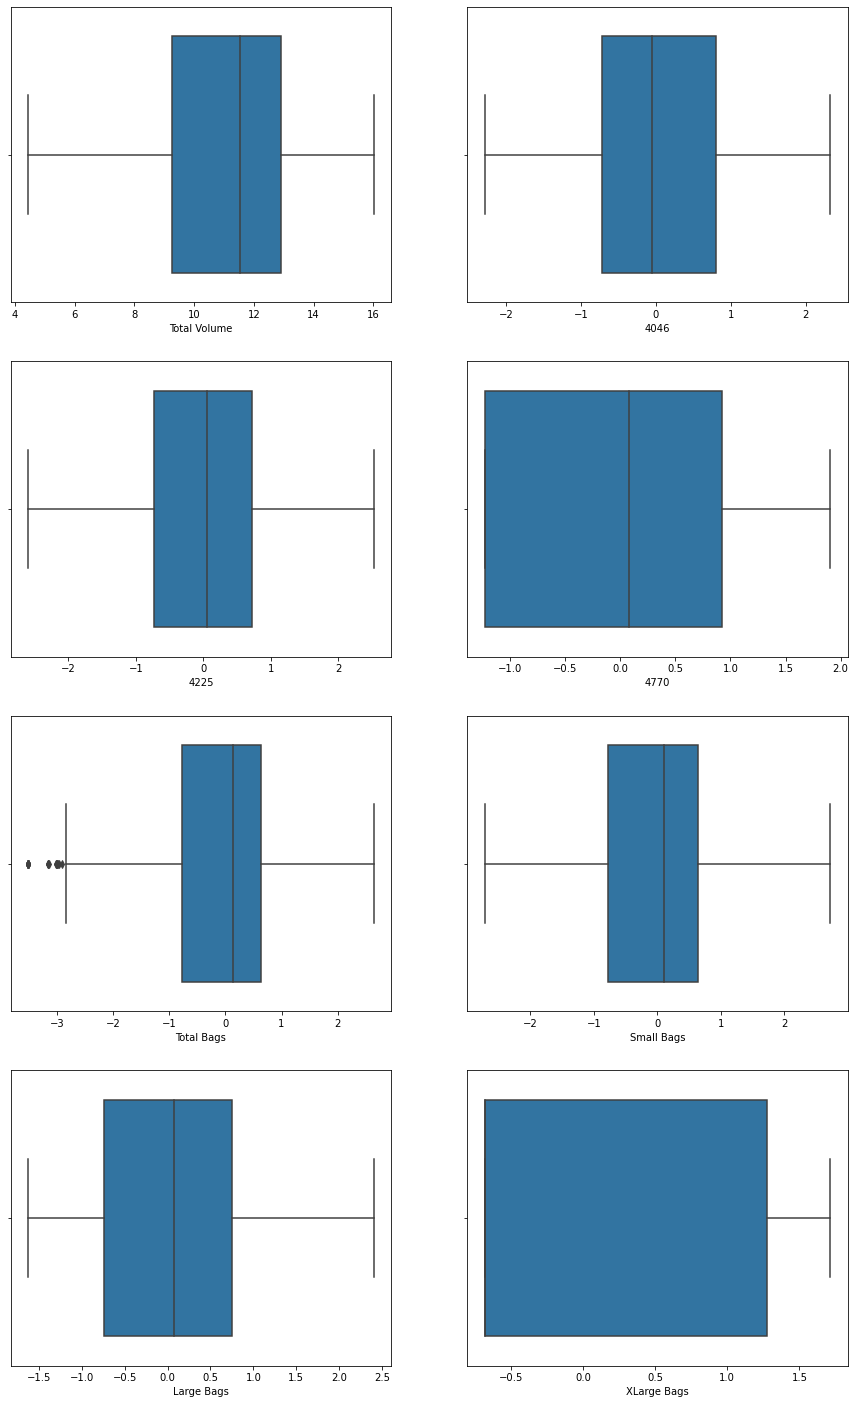

In [33]:
fig,ax=plt.subplots(4,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(contin):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.boxplot(data[n],ax=ax[r,c])
    c+=1

total bags having some of the outliers but that will not effect so let it be.

<AxesSubplot:>

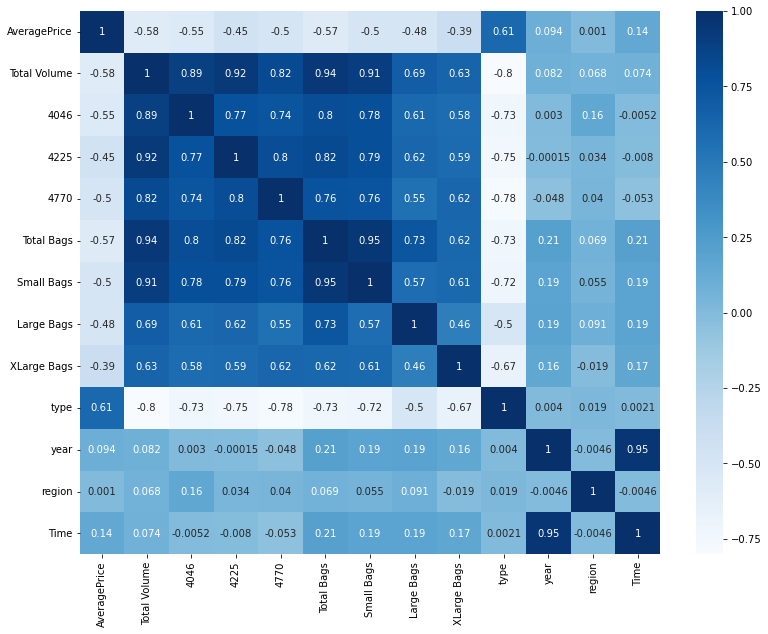

In [34]:
#now lets just see the correlation between labels and features if any using heatmap:

plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

average price showing negative correlation with each features except for type which is also acceptable.
some of the features showing more than 90% of the correlation with each other.

<AxesSubplot:xlabel='Total Volume', ylabel='Small Bags'>

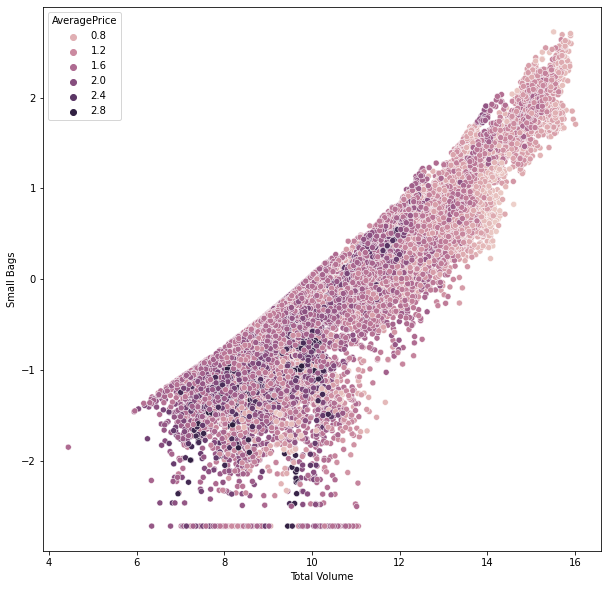

In [35]:


plt.figure(figsize=(10,10))
sns.scatterplot(x='Total Volume',y='Small Bags',hue='AveragePrice',data=data)

plot showing as the volume increases small bags also increases which seems to be logical. so not dropping the column.

<AxesSubplot:xlabel='Total Volume', ylabel='4225'>

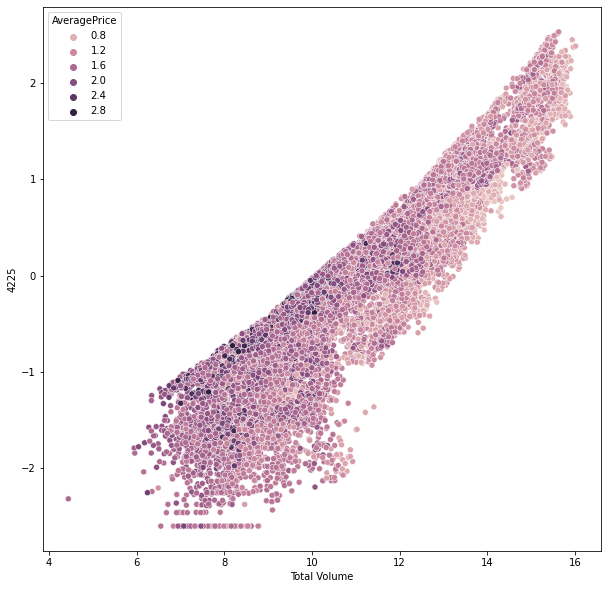

In [36]:
#similarly we can check for plu 4225
plt.figure(figsize=(10,10))
sns.scatterplot(x='Total Volume',y='4225',hue='AveragePrice',data=data)

this also seems to be logical that if total volume increases the bulk also increases.
so not droping that also.

In [37]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Time
0,1.33,11.070329,-0.656680,0.343354,-0.225265,-0.533827,-0.345079,-0.780539,-0.681835,0.0,2015,0.0,752
1,1.35,10.912849,-0.776088,0.262291,-0.178119,-0.494873,-0.309394,-0.770600,-0.681835,0.0,2015,0.0,745
2,0.93,11.680304,-0.730804,0.637769,0.020112,-0.562384,-0.371810,-0.757946,-0.681835,0.0,2015,0.0,738
3,1.08,11.277104,-0.631939,0.459419,-0.124295,-0.707629,-0.506936,-0.698663,-0.681835,0.0,2015,0.0,731
4,1.28,10.840357,-0.683674,0.254978,-0.113669,-0.681126,-0.486680,-0.606800,-0.681835,0.0,2015,0.0,724


In [38]:
x=data.copy()
x.drop('AveragePrice',axis=1,inplace=True)

y=data['AveragePrice']


In [39]:
print(x)

       Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         11.070329 -0.656680  0.343354 -0.225265   -0.533827   -0.345079   
1         10.912849 -0.776088  0.262291 -0.178119   -0.494873   -0.309394   
2         11.680304 -0.730804  0.637769  0.020112   -0.562384   -0.371810   
3         11.277104 -0.631939  0.459419 -0.124295   -0.707629   -0.506936   
4         10.840357 -0.683674  0.254978 -0.113669   -0.681126   -0.486680   
...             ...       ...       ...       ...         ...         ...   
18244      9.745361 -0.462146 -0.926620 -1.229296   -0.338978   -0.175485   
18245      9.538783 -0.617420 -0.671611 -1.229296   -0.506134   -0.329805   
18246      9.530012 -0.617367 -0.779654  0.439501   -0.500053   -0.311799   
18247      9.693089 -0.546697 -0.717264  0.439192   -0.431634   -0.249204   
18248      9.769361 -0.360300 -0.792388  0.153263   -0.391166   -0.211029   

       Large Bags  XLarge Bags  type  year  region  Time  
0       -0.78053

In [40]:
print(y)

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17852, dtype: float64


In [41]:
#scaling the data:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


In [42]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17852 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  17852 non-null  float64
 1   Total Volume  17852 non-null  float64
 2   4046          17852 non-null  float64
 3   4225          17852 non-null  float64
 4   4770          17852 non-null  float64
 5   Total Bags    17852 non-null  float64
 6   Small Bags    17852 non-null  float64
 7   Large Bags    17852 non-null  float64
 8   XLarge Bags   17852 non-null  float64
 9   type          17852 non-null  float64
 10  year          17852 non-null  int64  
 11  region        17852 non-null  float64
 12  Time          17852 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1.9 MB


In [43]:
x_scaled=scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
print(x)

       Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0          0.572844  0.353613  0.573507  0.320174    0.484162    0.436286   
1          0.559243  0.327777  0.557709  0.335208    0.490481    0.442839   
2          0.625524  0.337575  0.630882  0.398421    0.479530    0.431377   
3          0.590702  0.358967  0.596125  0.352372    0.455968    0.406561   
4          0.552982  0.347773  0.556284  0.355760    0.460267    0.410281   
...             ...       ...       ...       ...         ...         ...   
17847      0.458414  0.395705  0.326013  0.000000    0.515770    0.467432   
17848      0.440573  0.362108  0.375709  0.000000    0.488654    0.439091   
17849      0.439815  0.362120  0.354654  0.532160    0.489641    0.442398   
17850      0.453899  0.377410  0.366813  0.532061    0.500740    0.453893   
17851      0.460486  0.417741  0.352172  0.440882    0.507304    0.460904   

       Large Bags  XLarge Bags  type  year  region      Time  
0        0.2

Now the preprocessing is done :
lets go to the modelling phase:

In [44]:
from sklearn.model_selection import train_test_split,cross_val_score


In [45]:
#importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,classification_report


In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=123)

In [47]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=1000
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(p,ytest)
        if maxx>mse:
            maxx=mse
            j=state
    return j

In [48]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),SVR(),LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

names=['KNeighborsRegressor','SVR','LinearRegression','Lasso','Ridge','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor']

In [49]:
def createmodels(model_list,independent,dependent,n):
    xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.25,random_state=randomstate(independent,dependent))
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,independent,dependent,cv=10)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2))
        mcv.append(np.round(np.mean(score),4))
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross validaton Score']=mcv
    data.set_index('Model',inplace = True)
    return data

In [50]:
createmodels(models,x,y,names)


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,0.1062,0.0224,0.1498,8.300000e-01,0.0867
SVR,0.1434,0.0368,0.1918,6.700000e-01,0.3647
LinearRegression,0.2010,0.0645,0.2541,2.800000e-01,0.1606
Lasso,0.3231,0.1567,0.3958,-3.177471e+30,-1.2240
Ridge,0.2012,0.0646,0.2542,2.600000e-01,0.1610
DecisionTreeRegressor,0.1188,0.0322,0.1794,7.900000e-01,0.0640
RandomForestRegressor,0.0864,0.0152,0.1233,8.800000e-01,0.5197
AdaBoostRegressor,0.2029,0.0622,0.2494,2.500000e-01,0.1463
GradientBoostingRegressor,0.1437,0.0348,0.1864,6.500000e-01,0.4970


# Hyperparameter Tunning

In [51]:
from sklearn.model_selection import GridSearchCV


In [52]:
#knn
leaf = list(range(1,20))
k = list(range(1,20))
params={'n_neighbors':k,'leaf_size':leaf,'weights':['uniform','distance'],'metric':['euclidean','manhattan']}

In [53]:
g=GridSearchCV(KNeighborsRegressor(),params,cv=10)



In [54]:
g.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [55]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

KNeighborsRegressor(leaf_size=1, metric='manhattan', n_neighbors=3,
                    weights='distance')
{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
0.8924920521201134


In [56]:
m=KNeighborsRegressor(leaf_size=1, metric='manhattan', n_neighbors=3,weights='distance')
m.fit(x_train,y_train)
p=m.predict(x_test)
score=cross_val_score(m,x,y,cv=10)

In [57]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,y_test),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,y_test),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,y_test)),4))
print('R2 Score is',np.round(r2_score(p,y_test),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.0861
Mean Squared Error is 0.016
Root Mean Squared Error is 0.1266
R2 Score is 88.57000000000001
Mean of cross validaton Score is 29.2915


In [58]:
#randomforest

from sklearn.model_selection import RandomizedSearchCV


In [59]:
params={'n_estimators':[100, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
            'max_depth':[None,1,2,3,4,5,6,7,8]}

In [60]:
g=RandomizedSearchCV(RandomForestRegressor(),params,cv=10)


In [61]:
g.fit(x_train,y_train)


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 300, 500]})

In [62]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestRegressor(min_samples_leaf=3, min_samples_split=3, n_estimators=500)
{'n_estimators': 500, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': None}
0.8917699017057024


In [63]:
m=RandomForestRegressor(max_depth=None, min_samples_leaf=2, min_samples_split=2,n_estimators=100)
m.fit(x_train,y_train)
p=m.predict(x_test)
score=cross_val_score(m,x,y,cv=10)

In [64]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,y_test),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,y_test),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,y_test)),4))
print('R2 Score is',np.round(r2_score(p,y_test),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.0872
Mean Squared Error is 0.0157
Root Mean Squared Error is 0.1254
R2 Score is 87.67
Mean of cross validaton Score is 52.1829


RandomForestRegressor is giving the best result after hyperparameter tunning with r2 score 87.67% and minimum error. so finalizing randomforest model.

Text(0.5, 1.0, 'Random forest')

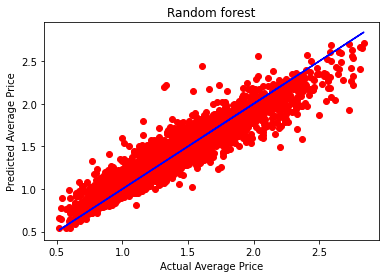

In [65]:
plt.scatter(x=y_test,y=p,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('Random forest')

In [66]:
final_model=RandomForestRegressor(max_depth=None, min_samples_leaf=2, min_samples_split=2,n_estimators=100)
final_model.fit(x_train,y_train)
p=final_model.predict(x_test)
score=cross_val_score(final_model,x,y,cv=10)

In [67]:
import joblib

In [68]:
#saving the model:
joblib.dump(final_model,'avacado project')

['avacado project']